<a href="https://colab.research.google.com/github/Shayestha/OIBSIP_Task1/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK 1: IRIS FLOWER CLASSIFICATION**

READ THE CSV DATASET AS PANDAS DATAFRAME

In [ ]:
from google.colab import files
uploaded_files=files.upload()


Saving Iris (1).csv to Iris (1).csv


IMPORTING ALL LIBRARIES

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
sns.set_style('darkgrid')

In [ ]:
data=pd.read_csv(r"Iris (1).csv")

In [ ]:
pd.concat([data.head(),data.tail()])

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
data.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
25,26,5.0,3.0,1.6,0.2,Iris-setosa
38,39,4.4,3.0,1.3,0.2,Iris-setosa
130,131,7.4,2.8,6.1,1.9,Iris-virginica
57,58,4.9,2.4,3.3,1.0,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
65,66,6.7,3.1,4.4,1.4,Iris-versicolor
14,15,5.8,4.0,1.2,0.2,Iris-setosa
88,89,5.6,3.0,4.1,1.3,Iris-versicolor
124,125,6.7,3.3,5.7,2.1,Iris-virginica
99,100,5.7,2.8,4.1,1.3,Iris-versicolor


In [ ]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
data.rename(columns={'SepalLengthCm':'Sepal_length','SepalWidthCm':'Sepal_width','PetalLengthCm':'Petal_length','PetalWidthCm':'Petal_width'},inplace=True)

In [ ]:
data.shape

(150, 6)

In [ ]:
data.columns

Index(['Id', 'Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width',
       'Species'],
      dtype='object')

In [ ]:
data.describe()

,Id,Sepal_length,Sepal_width,Petal_length,Petal_width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            150 non-null    int64  
 1   Sepal_length  150 non-null    float64
 2   Sepal_width   150 non-null    float64
 3   Petal_length  150 non-null    float64
 4   Petal_width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
def datainfo():
  df_temp=pd.DataFrame(index=data.columns)
  df_temp["Null Value"]=data.isnull().sum()
  df_temp["% of the Null Value"]=data.isnull().mean()*100
  df_temp["Not Null Value"]=data.count()
  df_temp["Unique Count"]=data.nunique()
  df_temp["Datatype"]=data.dtypes
  return df_temp
  datainfo()

In [ ]:
data.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
data[data.duplicated()]

,Id,Sepal_length,Sepal_width,Petal_length,Petal_width,Species


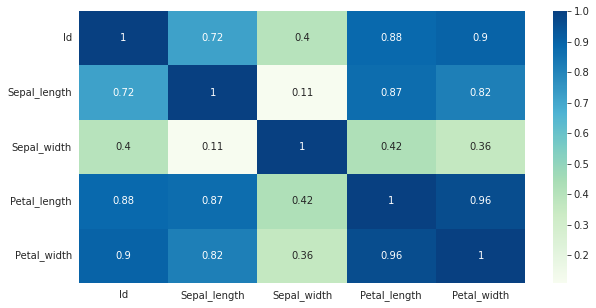

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(abs(data.corr()),cmap='GnBu',annot=True);

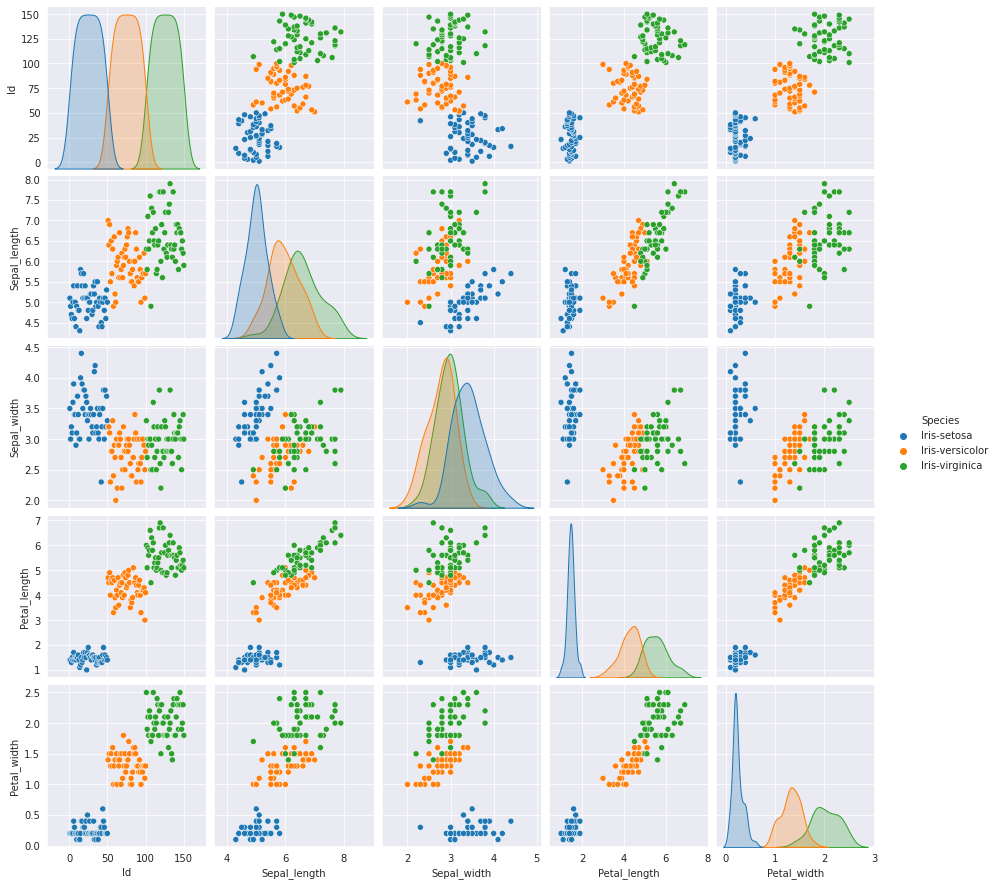

In [ ]:
sns.pairplot(data,hue='Species')

Text(0, 0.5, 'Sepal_width')

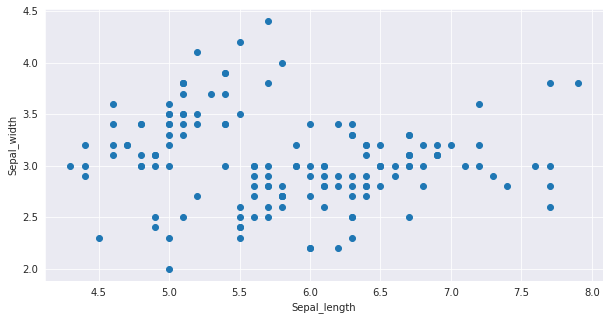

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter (data['Sepal_length'], data['Sepal_width'])
plt.xlabel('Sepal_length')
plt.ylabel('Sepal_width')


Text(0.5, 0, 'Petal_length')

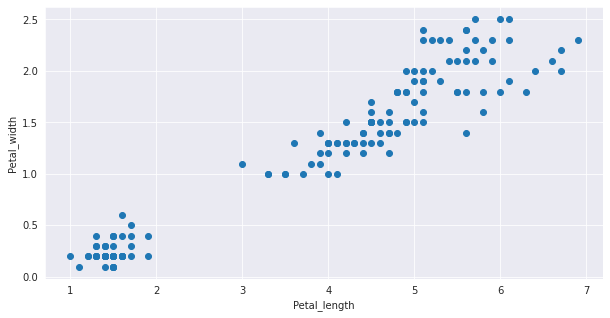

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(data['Petal_length'],data['Petal_width'],marker='o')
plt.ylabel('Petal_width')
plt.xlabel('Petal_length')

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
def map_species(f):
  if f=='setosa':
    f=0
  elif f=='versicolor':
    f=1
  elif f=='virginica':
    f=2
  return f

In [ ]:
data['Species']=data.Species.map(map_species)

In [ ]:
data.head()

,Id,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


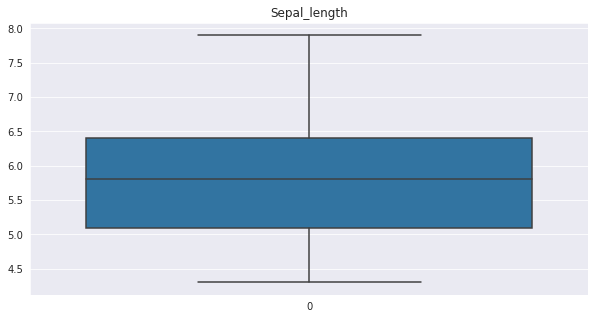

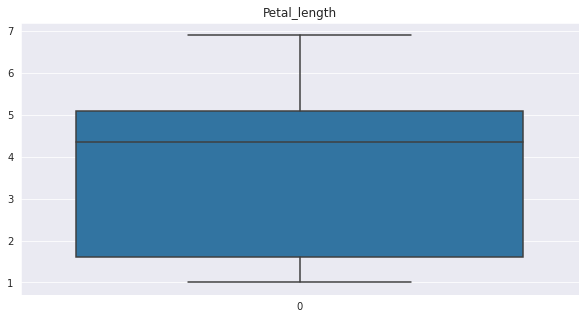

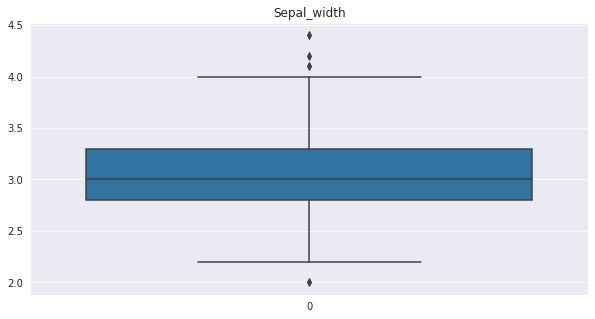

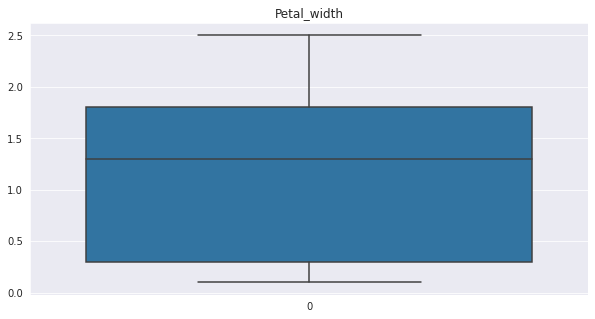

In [ ]:
for f in ['Sepal_length','Petal_length','Sepal_width','Petal_width']:
  plt.figure(figsize=(10,5))
  sns.boxplot(data[f])
  plt.title(f)

In [ ]:
X=data.iloc[:, :-1].values
y=data.iloc[:, -1].values

In [ ]:
sc=StandardScaler()
X=sc.fit_transform(X)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(112, 5) (38, 5) (112,) (38,)


In [ ]:
lg=LogisticRegression()

In [ ]:
lg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
pred=lg.predict(X_test)

-------------------Classification_Report---------------------------
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38

-------------------Accuracy_Score-----------------------------------
1.0
-------------------Confusion_Matrix---------------------------------


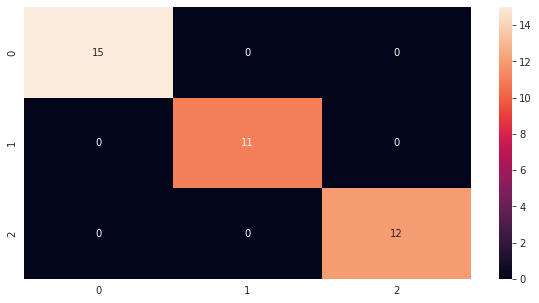

In [ ]:
print("-------------------Classification_Report---------------------------")
print(classification_report(y_test,pred))
print("-------------------Accuracy_Score-----------------------------------")
print(accuracy_score(y_test,pred))
print("-------------------Confusion_Matrix---------------------------------")
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test,pred),annot=True);
